<a href="https://colab.research.google.com/github/Manishpatil7975/AIML_ASSIGNMENTS/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
default      0
dtype: int64


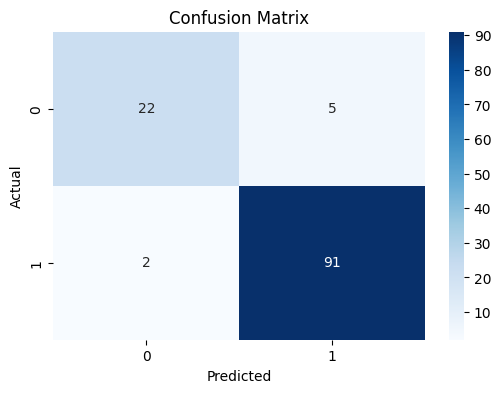

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.95      0.98      0.96        93

    accuracy                           0.94       120
   macro avg       0.93      0.90      0.91       120
weighted avg       0.94      0.94      0.94       120



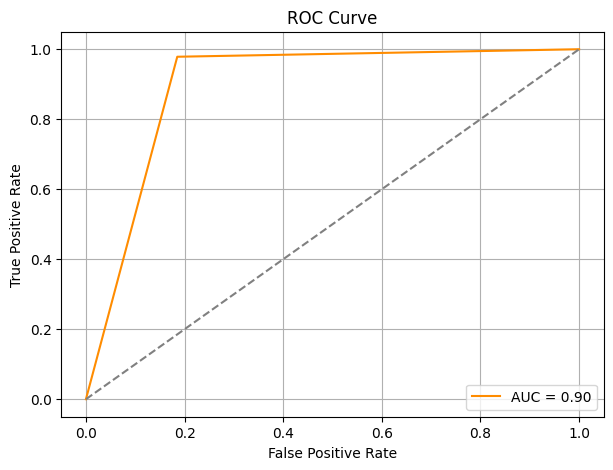


--- K-Fold Cross-Validation Scores (5-Fold) ---
Accuracy: 0.9600 ± 0.0122
Precision: 0.9653 ± 0.0057
Recall: 0.9839 ± 0.0177
F1-score: 0.9744 ± 0.0081


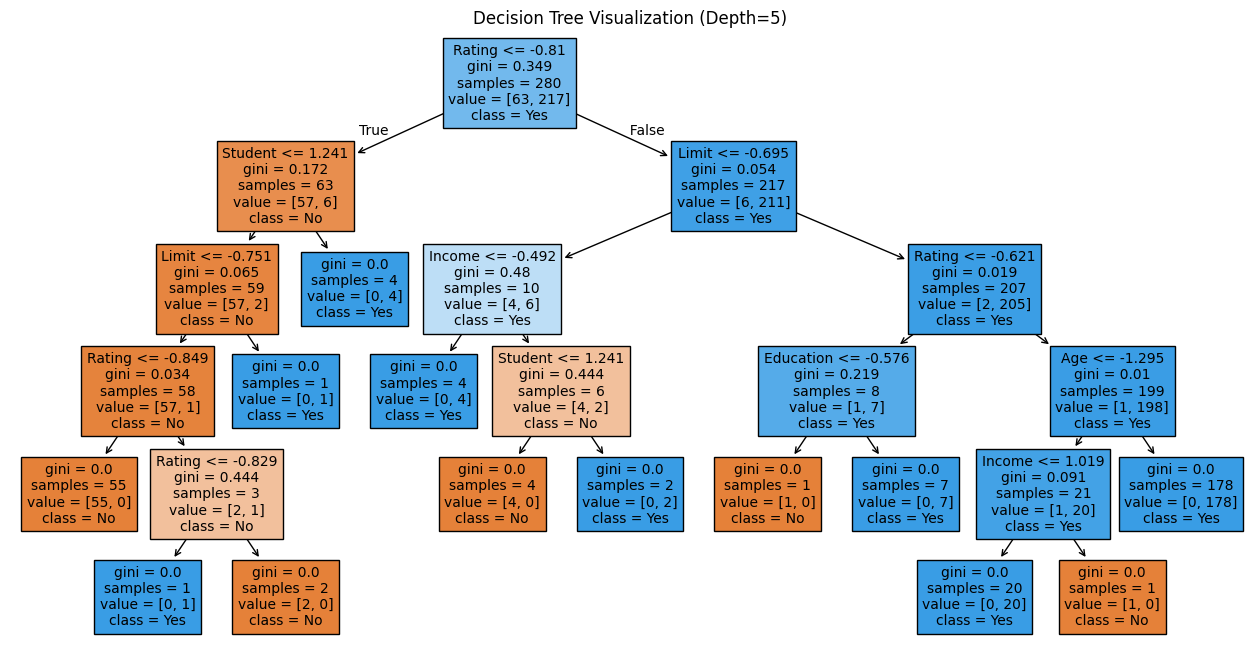

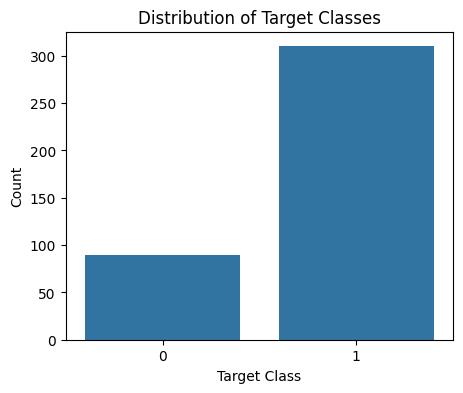

/tmp/ipython-input-938597778.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


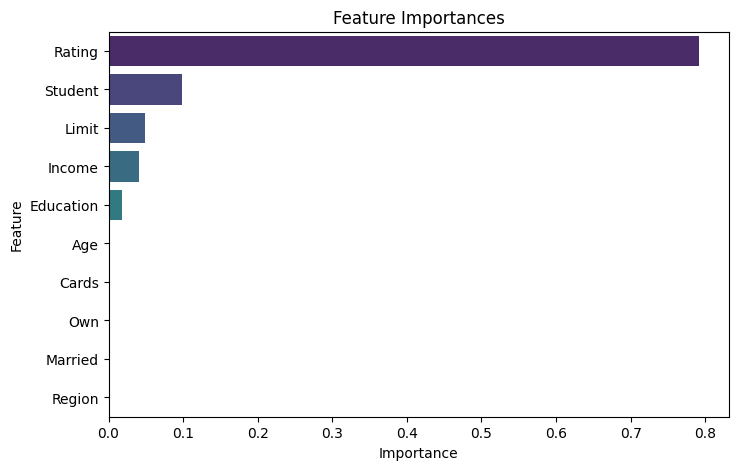

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Load the dataset
data = pd.read_csv('/content/Credit.csv')

# Drop ID column if exists
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)

# Create a binary target variable 'default' based on 'Balance'
# Assume default if Balance > 0
data['default'] = (data['Balance'] > 0).astype(int)

# Assume target is 'default'
target_col = 'default'

# Encode categorical variables (excluding the new 'default' column if it was created from an object type, though here it's int)
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Check for nulls
print("Missing values:\n", data.isnull().sum())

# Correctly assign X and y after identifying and encoding the target
y = data[target_col]
X = data.drop([target_col, 'Balance'], axis=1) # Drop both 'default' and original 'Balance' from features

# The target variable 'default' is already numerical (0 or 1) from the creation step
# No need to encode y again if it's already int

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = dt_model.predict(X_test_scaled)
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual") # Corrected typo from Gregor to ylabel
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- K-Fold Cross-Validation ---

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy = cross_val_score(dt_model, X, y, cv=cv, scoring='accuracy')
precision = cross_val_score(dt_model, X, y, cv=cv, scoring='precision')
recall = cross_val_score(dt_model, X, y, cv=cv, scoring='recall')
f1 = cross_val_score(dt_model, X, y, cv=cv, scoring='f1')

print("\n--- K-Fold Cross-Validation Scores (5-Fold) ---")
print(f"Accuracy: {accuracy.mean():.4f} ± {accuracy.std():.4f}")
print(f"Precision: {precision.mean():.4f} ± {precision.std():.4f}")
print(f"Recall: {recall.mean():.4f} ± {recall.std():.4f}")
print(f"F1-score: {f1.mean():.4f} ± {f1.std():.4f}")

# --- Plot the Decision Tree ---
plt.figure(figsize=(16, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.title("Decision Tree Visualization (Depth=5)")
plt.show()

# --- Distribution of target class ---
plt.figure(figsize=(5, 4))
sns.countplot(x=y)
plt.title("Distribution of Target Classes")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

# --- Feature Importance ---
importances = dt_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [4]:
print("Value counts of the target variable:")
display(y.value_counts())

Value counts of the target variable:


,count
Balance,
0,90
133,3
1048,3
531,3
108,2
...,...
611,1
669,1
605,1


In [6]:
print("Columns in the DataFrame:")
print(data.columns)

Columns in the DataFrame:
Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance'],
      dtype='object')
